# Chapter 4 - Exercise 4: Text Classification
# Cho dữ liệu sklearn.datasets.fetch_20newsgroups chứa các văn bản ngắn được phân chia thành 20 loại khác nhau.

Yêu cầu: Đọc dữ liệu của 3 loại là 
+ 'comp.graphics', 
+ 'rec.sport.baseball',
+ 'sci.electronics'; 

## Chuẩn hóa dữ liệu (nếu cần) và áp dụng thuật toán Naive Bayes để thực hiện việc dự đoán một văn bản thuộc vào loại nào trong ba loại nói trên.
1. Lấy train.data, train.target, test.data, test.target từ dữ liệu trên.
2. Áp dụng thuật toán Naive Bayer => kết quả
3. Đánh giá mô hình
4. Ghi mô hình
5. Đọc mô hình vừa ghi => dự đoán kết quả cho câu 6
6. Cho dữ liệu Test:
   + X_new = np.array(["The field is considered a subset of visual communication and communication design. They use typography, visual arts, and page layout techniques to create visual compositions.", 'Clubs are conducting Summer Camp at the ballparks in their home cities (not their Spring Training facilities).', 'NXP claims to be first to deliver in-vehicle multi-device simultaneous wireless charging driven by a single MWCT controller. NXP has expanded its offerings to the 15W wireless power standard, enabling faster charging."]) 

=> sẽ là văn bản thuộc các loại nào?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',10)

## <span style='color:yellow'>  1. Lấy train.data, train.target, test.data, test.target từ dữ liệu trên.

In [40]:
from sklearn.datasets import fetch_20newsgroups

fetch_20newsgroups().target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
classes = ['comp.graphics', 'rec.sport.baseball', 'sci.electronics']

train = fetch_20newsgroups(subset='train', categories = classes)
test = fetch_20newsgroups(subset='train', categories = classes)

In [34]:
unique_values, unique_counts = np.unique(train['target'], return_counts=True)
print(f'Value counts of train output classes:\n {np.asanyarray((unique_values, unique_counts))}')

Value counts of train output classes:
 [[  0   1   2]
 [584 597 591]]


In [46]:
x_train = pd.Series(train['data'])
y_train = train['target']

x_test = pd.Series(test['data'])
y_test = test['target']

## <span style='color:yellow'> 2. Áp dụng thuật toán Naive Bayer => kết quả
## <span style='color:yellow'> 3. Đánh giá mô hình

GaussianNB accuracy score on train set: 0.9977426636568849
GaussianNB accuracy score on test set: 0.9977426636568849


Confusion matrix:
                     comp.graphics  rec.sport.baseball  sci.electronics
comp.graphics                 582                   1                1
rec.sport.baseball              0                 597                0
sci.electronics                 2                   0              589


Classification report:
                     precision    recall  f1-score   support

     comp.graphics       1.00      1.00      1.00       584
rec.sport.baseball       1.00      1.00      1.00       597
   sci.electronics       1.00      1.00      1.00       591

          accuracy                           1.00      1772
         macro avg       1.00      1.00      1.00      1772
      weighted avg       1.00      1.00      1.00      1772



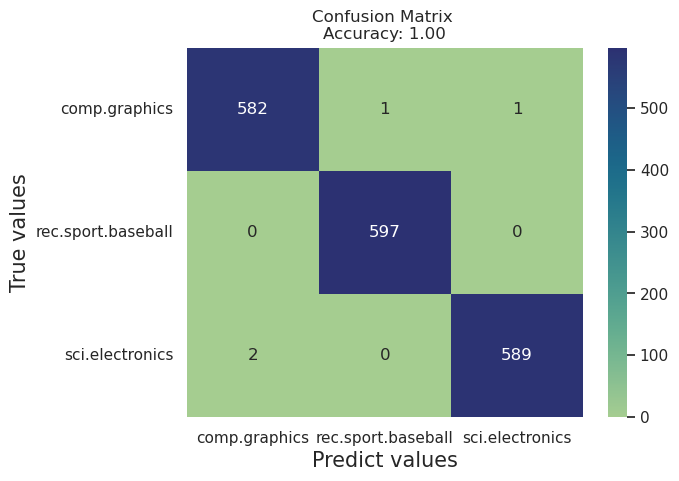

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

nbMulti_pipe = Pipeline([
    ("Tf-Idf", TfidfVectorizer(stop_words='english')),
    ('Multinomial_Naive_Bayes', MultinomialNB())
])

nbMulti_pipe.fit(x_train, y_train)

y_test_pred = nbMulti_pipe.predict(x_test)
y_test_proba = nbMulti_pipe.predict_proba(x_test)

print(f'MultinomialNB accuracy score on train set: {accuracy_score(y_train, nbMulti_pipe.predict(x_train))}')
print(f'MultinomialNB accuracy score on test set: {accuracy_score(y_test, y_test_pred)}')
print()
labels = ['comp.graphics', 'rec.sport.baseball', 'sci.electronics']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')

sbn.heatmap(cm_df, cmap="crest", annot=True, fmt=".0f")
plt.xlabel('Predict values', size=15)
plt.ylabel('True values', size=15)
plt.title(f'Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_test_pred):.2f}')

plt.show()

## <span style='color:yellow'> 6. Cho dữ liệu Test:
   + X_new = np.array(["The field is considered a subset of visual communication and communication design. They use typography, visual arts, and page layout techniques to create visual compositions.", 'Clubs are conducting Summer Camp at the ballparks in their home cities (not their Spring Training facilities).', 'NXP claims to be first to deliver in-vehicle multi-device simultaneous wireless charging driven by a single MWCT controller. NXP has expanded its offerings to the 15W wireless power standard, enabling faster charging."]) 

In [60]:
X_new = pd.DataFrame({'Text':["The field is considered a subset of visual communication and communication design. They use typography, visual arts, and page layout techniques to create visual compositions.", 
"Clubs are conducting Summer Camp at the ballparks in their home cities (not their Spring Training facilities).", 
"NXP claims to be first to deliver in-vehicle multi-device simultaneous wireless charging driven by a single MWCT controller. NXP has expanded its offerings to the 15W wireless power standard, enabling faster charging."]})

X_new['Class_predict'] = nbMulti_pipe.predict(X_new['Text'])

X_new['Class_label'] = X_new['Class_predict'].apply(lambda x: classes[0] if x==0 \
                                                   else classes[1] if x==1 \
                                                   else classes[2])

X_new

,Text,Class_predict,Class_label
0,The field is considered a subset of visual com...,2,sci.electronics
1,Clubs are conducting Summer Camp at the ballpa...,1,rec.sport.baseball
2,NXP claims to be first to deliver in-vehicle m...,2,sci.electronics
